## Background

For this exercise. We will use some data from the [general social
survey](http://gss.norc.org/), an annual personal-interview survey
conducted in the United States. The survey is designed to monitor
changes in both social characteristics and attitudes.

For this exercise, the **population** of interest will be **ALL** 2538
individuals living in a single neighborhood in 2014.

If you get stuck as you are working through this Problem Set, it will
likely be helpful to review [Chapter 7 in ModernDive](https://moderndive.com/7-sampling.html), 
in particular subsections 7.3.1 on “Terminology & notation” and 7.3.2 on “Statistical
definitions”. The terminology, notation, and definitions related to
sampling are definitely tricky at first; the best method to master them
is practice, practice, practice.

### Key Symbols:

| Symbol          | Population Parameter | Point Estimate |
|-----------------|----------------------|----------------|
| Number of cases | $N$                  | $n$            |
| Proportion      | $p$                  | $\hat{p}$      |
| Standard error  | $SE$                 | $\widehat{SE}$ |

## Setup

First load the necessary packages:

In [3]:
library(ggplot2)
library(dplyr)
library(forcats)
library(moderndive)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”


The GSS data we will be working with is in the `gss_cat` data frame,
which comes built-in with the `forcats` package you just loaded. You can
take a `glimpse()` of the `gss_cat` data set like so:

In [4]:
data(gss_cat)
glimpse(gss_cat)

Rows: 21,483
Columns: 9
$ year    <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 20…
$ marital <fct> Never married, Divorced, Widowed, Never married, Divorced, Mar…
$ age     <int> 26, 48, 67, 39, 25, 25, 36, 44, 44, 47, 53, 52, 52, 51, 52, 40…
$ race    <fct> White, White, White, White, White, White, White, White, White,…
$ rincome <fct> $8000 to 9999, $8000 to 9999, Not applicable, Not applicable, …
$ partyid <fct> "Ind,near rep", "Not str republican", "Independent", "Ind,near…
$ relig   <fct> Protestant, Protestant, Protestant, Orthodox-christian, None, …
$ denom   <fct> "Southern baptist", "Baptist-dk which", "No denomination", "No…
$ tvhours <int> 12, NA, 2, 4, 1, NA, 3, NA, 0, 3, 2, NA, 1, NA, 1, 7, NA, 3, 3…


## Exploratory data wrangling

This data set includes many years of data, and many variables. To start,
we will restrict our analysis to only 2014, and to only the variable
indicating the `marital` status of each respondent.

In [5]:
gss_14 = gss_cat |> 
  filter(year == 2014) |> 
  select(marital)

The following shows all the unique responses for `marital` status:

In [6]:
gss_14 |>
  distinct(marital) 

marital
<fct>
Divorced
Married
Never married
Separated
Widowed
No answer


## Setting a seed for your computer’s Random Number Generator

In this problem set, will take some random samples of data using R. In
order to make sure R takes the same random sample every time you run
your code (so you can reproduce your work), you can do what is called
“setting a seed”. Do this in any code chunk where you take a random
sample! Otherwise, the answers you write down might accidentally become
out of sync with the output of your code when your knit your document!

You can control your computer’s random number generator by providing a
number to using the `set.seed` function. Any number will do - in the
example below, we use 45 as our seed value.

In [7]:
set.seed(45)

## The true population proportion $p$ of divorced people

Again, for this exercise, the **population** of interest will be **ALL**
2,538 individuals living in this single neighborhood in 2014. Since we
have data on **ALL** 2538 people living in the neighborhood, we can
compute the **exact population proportion $p$ of divorced people
directly** using **ALL** the data:

In [8]:
gss_14 %>% 
  summarize(divorced = sum(marital == "Divorced"), 
            N = n()) |>
  mutate(p = divorced / N)

divorced,N,p
<int>,<int>,<dbl>
411,2538,0.1619385


> Note that we used $N$ (the size of the full population, 2,538 people)
> and computed $p$ (not $\hat{p}$ ). And, no inference from sample to
> the population is needed. This is because we’re working with the
> **entire population** of interest. We do not need to *estimate* the
> true proportion, or infer something about the true population
> proportion of divorced people in this neighborhood in 2014, because in
> this case, we can compute it directly (just like counting all red
> balls in the bowl). Thus, we know that $p$ is exactly 0.16. In other
> words, this situation is not a realistic reflection of a real life
> problem.

For the rest of this problem set, we will be *simulating* the act of
sampling from this neighborhood population to understand and study how
factors like sample size influence **sampling variation**.

## Demo: Sampling 50 people in the neighborhood

### Estimating $\hat{p}$ from a single sample

We are first going to use random sampling to **ESTIMATE** the true
**population** proportion $p$ of the neighborhood that are divorced with
only a **sample** of 50 people.

> This will represent a situation of only having the resources to knock
> on 50 doors to get responses from people in this neighborhood!

In [9]:
set.seed(42)

n50_1rep = gss_14 |> 
  rep_sample_n(size = 50, reps = 1)

n50_1rep |> count(marital)

replicate,marital,n
<int>,<fct>,<int>
1,Never married,13
1,Divorced,8
1,Widowed,6
1,Married,23


Remember, you can set the seed to whatever value you like.

Next, let’s calculate the **sample proportion** $\hat{p}$ of people who
identified as `Divorced` in our sample of 50 people.

In [10]:
n50_1rep |> 
  summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
  mutate(p_hat = divorce_count/ n)

replicate,divorce_count,n,p_hat
<int>,<int>,<int>,<dbl>
1,8,50,0.16


This sample proportion $\hat{p}$ is an **ESTIMATE**; it’s our **best
guess** of what the **true population** proportion $p$ of `Divorced`
people is in this neighborhood, based on a sample of only 50 people. It
is reasonably close to the true population proportion $p = 0.16$ we
calculated from the full population.

# Question 1.a)

Modify the code below to take 3 samples of 50 people instead of just 1
sample, and then compute an estimate of the proportion of Divorced
people in the entire population from each sample individually.

(**Hint:** Use `group_by` followed by the same `summarize` code as above.)

In [11]:
set.seed(18)

n50_3rep = gss_14 |>
  rep_sample_n(size = 50, reps = 3) |>
    group_by(replicate)|>
    summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
              mutate(p_hat = divorce_count/ n)

n50_3rep

replicate,divorce_count,n,p_hat
<int>,<int>,<int>,<dbl>
1,6,50,0.12
2,9,50,0.18
3,8,50,0.16


## Question 1.b)

How do the $\hat{p}$ estimates from different samples compare? Why was
your estimate different each time?

**Answer:**

𝑝̂  estimates from different samples differ from each other. Estimates are different each time because the samples are drawn independent of each other, hence 𝑝̂  estimates from different samples are different. 

### Estimating $\widehat{SE}$ from a single sample

Typically we only have the opportunity to collect **one sample** for our
study, and so we have to use the amount of variability in our **single
sample** as an estimate of the amount of variability we might expect in
our results if we had taken a random sample of 50 different people. The
$\widehat{SE}_{\hat{p}}$ serves as an **ESTIMATE** of **sampling
variability** if you only have a **single sample**. The formula for
estimating the standard error of $\hat{p}$ is the following:

$$\widehat{SE}_{\hat{p}}  \approx  \sqrt{\frac{\hat{p} \times (1-\hat{p})}{n}}$$

> Note that we use $n$ to represent the size of the sample and we that
> use $\hat{p}$ to represent the proportion of divorced people because
> we are ESTIMATING a proportion based on only a sample. Likewise, the
> SE “wears a hat” because we are ESTIMATING the true standard error
> based on a sample.

The standard error of $\hat{p}$ can be estimated in R like so:

In [12]:
n50_1rep |> 
  summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
  mutate(p_hat = divorce_count/ n, 
         se_hat = sqrt(p_hat * (1 - p_hat) / n))

replicate,divorce_count,n,p_hat,se_hat
<int>,<int>,<int>,<dbl>,<dbl>
1,8,50,0.16,0.05184593


## Demo: Generating a sampling distribution of $\hat{p}$

If you ran the code chunk that takes a random sample of 50 people a
thousand more times, and wrote down every $\hat{p}$ you got, you would
have constructed a “sampling distribution” of the proportion of divorced
people.

> A sampling distribution shows every (or nearly every!) possible value
> a point estimate can take on, along with how likely each value is to
> be observed, for samples **of a given size** from a population.

### Sampling distribution of $\hat{p}$ for n = 50

Instead of running the sampling code chunk for n = 50 over and over, we
can “collect” 1000 samples of n = 50 really easily in R. The following
code chunk takes 1000 **different** samples of n = 50 and stores them in
the data frame `n50_1000rep`:

In [13]:
set.seed(19)

n50_1000rep = gss_14 |> 
  rep_sample_n(size = 50, reps = 1000)

glimpse(n50_1000rep)

Rows: 50,000
Columns: 2
Groups: replicate [1,000]
$ replicate <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ marital   <fct> Divorced, Never married, Never married, Widowed, Married, Wi…


Be sure to look at `n50_rep1000` using `glimpse` to get a sense of
these 1000 samples look like.

## Question 2.a)

What is the name of the column in the `n50_1000rep` data frame that
identifies which of the 1000 samples an observation belongs to?

**Answer:**

replicate



## Question 2.b)

What is the sample size n for each of the 1000 samples we took?
(i.e. how many people are sampled each time)?

**Answer:**

50



The following code chunk calculates the sample proportion $\hat{p}$ of
people who reported they were divorced for each of the **1000 samples**

In [14]:
p_hat_n50_1000rep = n50_1000rep |> 
  group_by(replicate) |> 
  summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
  mutate(p_hat = divorce_count / n)

Take a look at the first five rows of the results:

In [15]:
p_hat_n50_1000rep |>
  head(5)

replicate,divorce_count,n,p_hat
<int>,<int>,<int>,<dbl>
1,4,50,0.08
2,5,50,0.10
3,8,50,0.16
4,9,50,0.18
5,10,50,0.20


### Visualizing the sampling distribution of $\hat{p}$ for n = 50

We can plot the **sampling distribution** of these 1000 $\hat{p}$
estimates of divorced respondents with a histogram, like so:

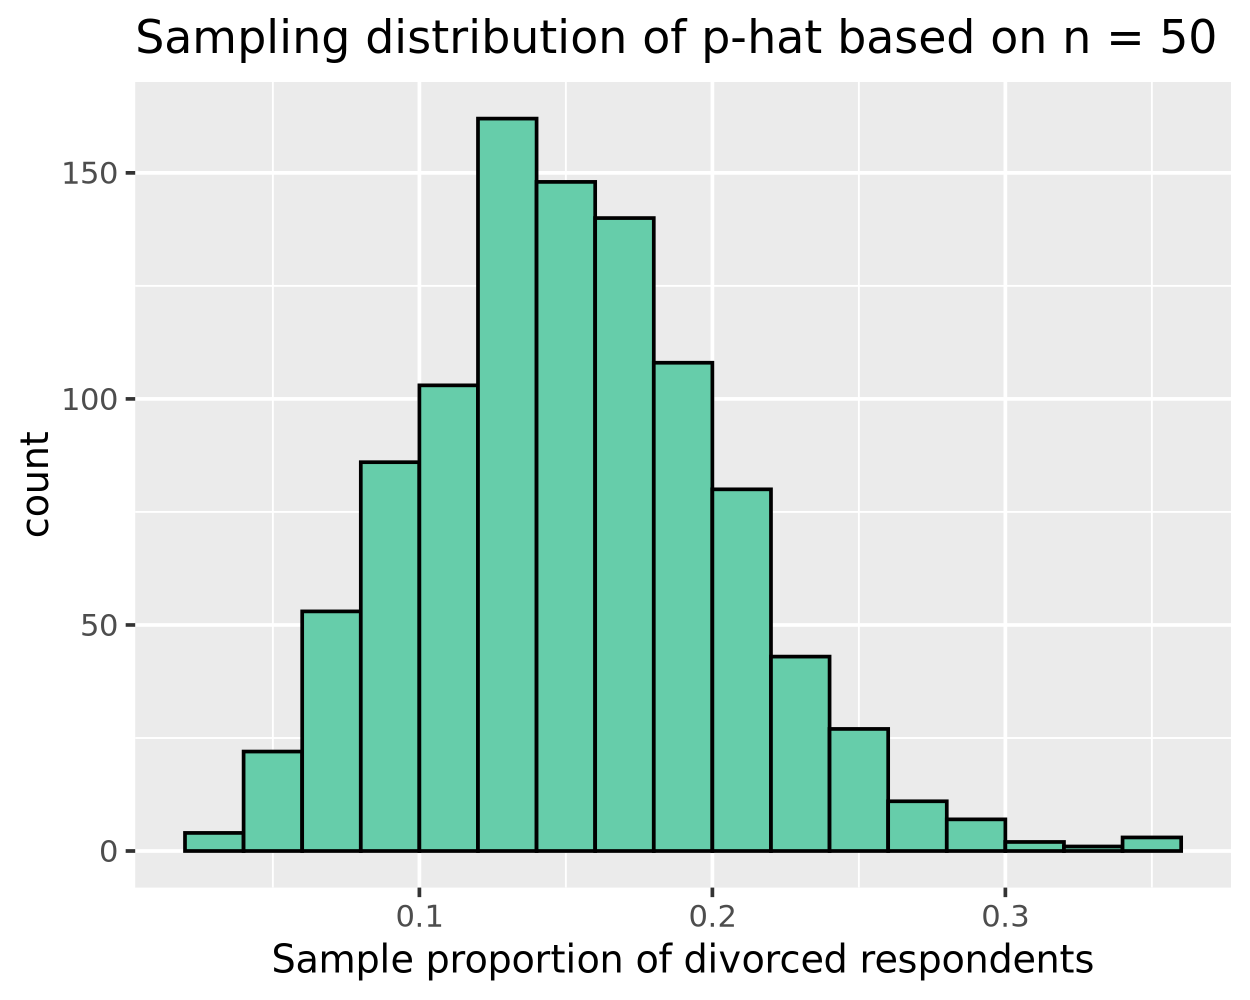

In [16]:
ggplot(p_hat_n50_1000rep, aes(x = p_hat)) +
  geom_histogram(binwidth = 0.02, color = "black", fill = "aquamarine3", boundary=0) +
  labs(x = "Sample proportion of divorced respondents", 
       title = "Sampling distribution of p-hat based on n = 50") 

## Question 3

Based on the histogram above, what appeared to be a very common (i.e.,
likely) value of $\hat{p}$? What was a very uncommon (i.e., unlikely)
value?

**Answer:**

0.13 is a likely value of 𝑝̂, >0.3 would be an uncommon value.


### Mean and standard error of the sampling distribution of $\hat{p}$ for n = 50

Finally we can estimate the mean of the sampling distribution by
calculating the mean of all 1000 $\hat{p}$ estimates, and the standard
error of the sampling distribution by calculating the standard deviation
of all 1000 $\hat{p}$ values like so:

In [17]:
p_hat_n50_1000rep |>
  summarize(M_p_hat = mean(p_hat), 
            SE_p_hat = sd(p_hat))

M_p_hat,SE_p_hat
<dbl>,<dbl>
0.16198,0.052215


Basically, we treat the 1000 point estimates of the population
proportion just like any other sample of numbers.

## Question 4

How do the population proportion and standard error estimates computed
by taking the mean and standard deviation of the 1000 simulated sample
proportions compare to the estimates of $\hat{p}$ and $\widehat{SE}$
based on your **single** sample of 50 people earlier in this Problem
Set?

**Answer:**

The mean and standard deviation of the 1000 simulated sample proportions are 0.16198 and 0.052215, respectively. Estimates of 𝑝̂  and  𝑆𝐸ˆ  based on single sample of 50 people are 0.16 and 0.05184593, respectively. The estimates are very close to each other, but the mean of the 1000 simulated sample proportions better capture our population proportion of 0.1619385. 



## Question 5.a)

Use the `rep_sample_n` function to collect 1000 virtual samples of size
*n* = 15. **BE SURE TO NAME YOUR SAMPLE SOMETHING NEW, TO ENSURE YOU CAN
DISTINGUISH IT FROM THE n = 50 SAMPLE ABOVE!**

**Answer:**

In [18]:
set.seed(910)

n15_1000rep = gss_14 |> 
  rep_sample_n(size = 15, reps = 1000)

glimpse(n15_1000rep)

Rows: 15,000
Columns: 2
Groups: replicate [1,000]
$ replicate <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, …
$ marital   <fct> Married, Never married, Widowed, Married, Married, Divorced,…


## Question 5.b)

Calculate sample proportion $\hat{p}$ of people who reported they were
`Divorced` for each replicate of your n = 15 sampling

**Answer:**

In [19]:
p_hat_n15_1000rep = n15_1000rep |> 
  group_by(replicate) |> 
  summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
  mutate(p_hat = divorce_count / n)

glimpse(p_hat_n15_1000rep)

Rows: 1,000
Columns: 4
$ replicate     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ divorce_count <int> 2, 2, 1, 4, 2, 1, 0, 3, 2, 4, 1, 1, 3, 2, 2, 1, 0, 3, 3,…
$ n             <int> 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, …
$ p_hat         <dbl> 0.13333333, 0.13333333, 0.06666667, 0.26666667, 0.133333…


## Question 5.c)

Visualize the sampling distribution of $\hat{p}$ from your n = 15
sampling with a histogram

**Answer:**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


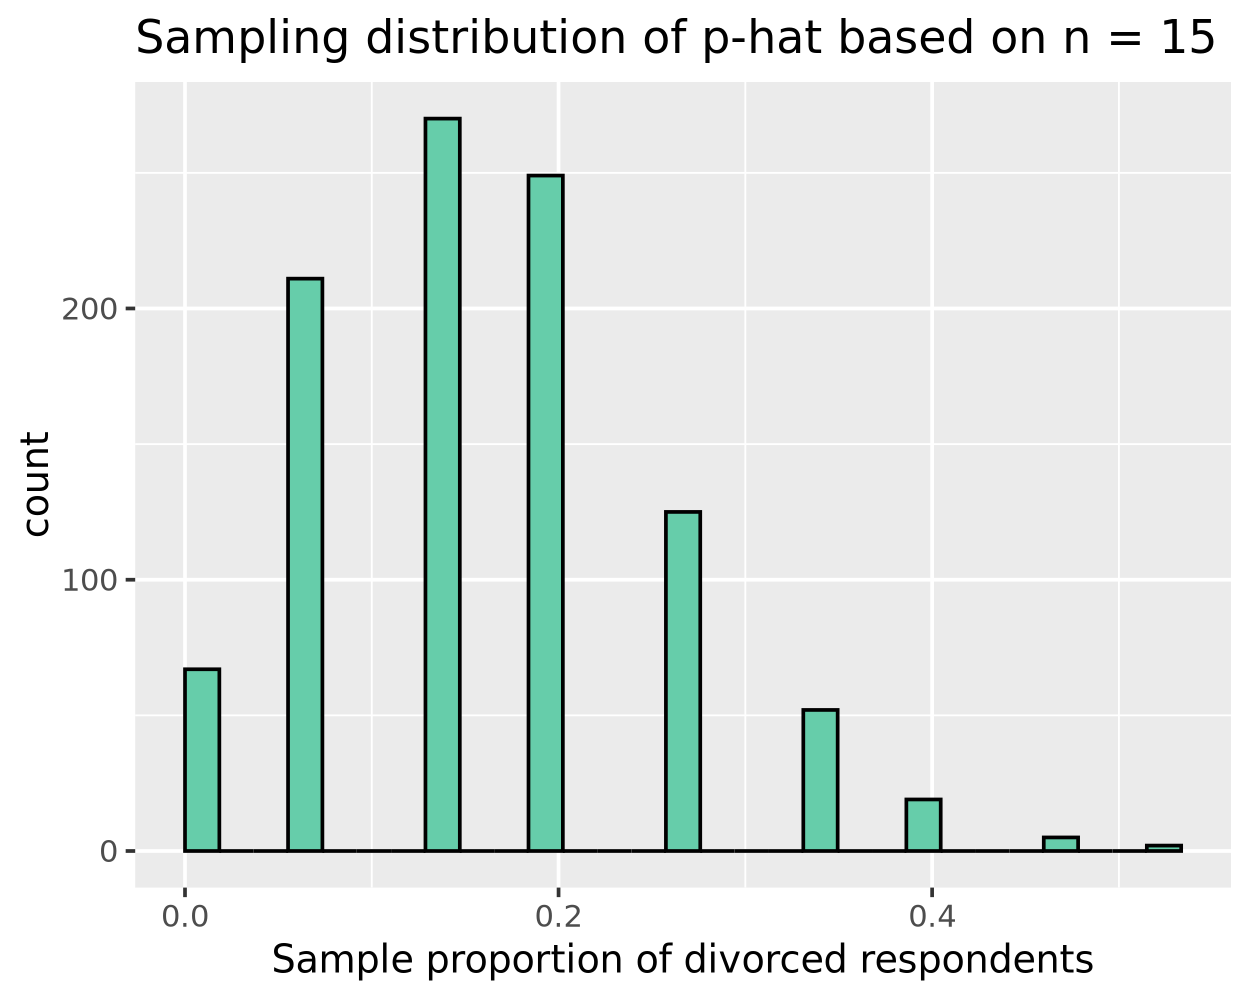

In [20]:
ggplot(p_hat_n15_1000rep, aes(x = p_hat)) +
  geom_histogram(color = "black", fill = "aquamarine3", boundary=0) +
  labs(x = "Sample proportion of divorced respondents", 
       title = "Sampling distribution of p-hat based on n = 15") 



## Question 5.d)

Calculate the mean of the n = 15 sampling distribution, and the standard
error of the n = 15 sampling distribution

**Answer:**

In [21]:

p_hat_n15_1000rep |>
  summarize(M_p_hat = mean(p_hat), 
            SE_p_hat = sd(p_hat))


M_p_hat,SE_p_hat
<dbl>,<dbl>
0.1615333,0.09475327


## Question 6.a)

How does the standard error of the n= 15 sampling distribution compare
to the standard error of the n = 50 sampling distribution?

**Answer:**

The standard error of the n=15 sampling distribution is greater than the standard error of the n=50 sampling distribution



## Question 6.b)

Explain any observed differences from Question 6a

**Answer:**

As the sample size increases, there are fewer differences due to sampling variation and the distribution centers more tightly around a value.



## Question 7.a)

Use the `rep_sample_n` function to collect 1000 virtual samples of size
*n* = 600. **Note: BE SURE TO NAME YOUR SAMPLE SOMETHING NEW, TO ENSURE
YOU CAN DISTINGUISH IT FROM THE n = 50, and n = 15 SAMPLES ABOVE!**

**Answer:**

In [22]:
set.seed(84)

n600_1000rep = gss_14 |> 
  rep_sample_n(size = 600, reps = 1000)

glimpse(n600_1000rep)



Rows: 600,000
Columns: 2
Groups: replicate [1,000]
$ replicate <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ marital   <fct> Married, Never married, Married, Never married, Widowed, Mar…


## Question 7.b)

Calculate the proportion $\hat{p}$ of people who reported they were
`Divorced`for each replicate of your n = 600 sampling

**Answer:**

In [23]:
p_hat_n600_1000rep = n600_1000rep |> 
  group_by(replicate) |> 
  summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
  mutate(p_hat = divorce_count / n)

glimpse(p_hat_n600_1000rep)



Rows: 1,000
Columns: 4
$ replicate     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ divorce_count <int> 105, 100, 102, 107, 93, 98, 93, 97, 100, 96, 91, 101, 92…
$ n             <int> 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 6…
$ p_hat         <dbl> 0.1750000, 0.1666667, 0.1700000, 0.1783333, 0.1550000, 0…


## Question 7.c)

Calculate the mean of the n = 600 sampling distribution, and the
standard error of the n = 600 sampling distribution.

**Answer:**

In [24]:
p_hat_n600_1000rep |>
  summarize(M_p_hat = mean(p_hat), 
            SE_p_hat = sd(p_hat))



M_p_hat,SE_p_hat
<dbl>,<dbl>
0.1622667,0.01334838


## Question 7.d)

Was there more **variability** from sample to sample when we took a
sample size of 600 or when we took a sample size of 50? **Explain what
evidence you have for assessing this**

**Answer:**

There is more variability from sample to sample when we took a sample size of 50. The standard error of p_hat is less for a sample size of 600 than for a smaple of 50.



## Question 8

Which sampling distribution looked more normally distributed (bell
shaped and symmetrical); the one built on n = 15, 50 or 600? **Why?**

**Answer:**

n=600 because there is less variability from sample to sample as the sample size increases.



## Estimating $\hat{p}$ and the standard error of $\hat{p}$ from a single sample (revisited)

In most instances, we do not have access to the full population as we
did in this GSS data; instead we have to take a **sample** to try to say
something about the **larger population**. Furthermore, in the real
world, we typically only take a **single** sample from the population,
due to time or money constraints.

So how do we **ESTIMATE** a $\hat{p}$ and a standard error of $\hat{p}$
when we only have a single sample, and not 1000 repeated samples? As
demonstrated at the very beginning of the Problem Set we:

-   estimate $\hat{p}$ from the sample
-   use the formula for the standard error of $\hat{p}$ below, to
    estimate SE based on a single sample

$$\widehat{SE}_{\hat{p}}  \approx  \sqrt{\frac{\hat{p} \times (1-\hat{p})}{n}}$$

## Question 9

Imagined we collected only a single small sample of 15 respondents like
so:

In [25]:
set.seed(53)

n15_1rep = gss_14 |> 
  rep_sample_n(size = 15, reps = 1)

Following the example from the beginning of the Problem Set (roughly
line 140), estimate

1.  The sample proportion $\hat{p}$ of people who identified as
    `Divorced` based on `n15_1rep`.
2.  The standard error of $\hat{p}$

In [26]:
n15_1rep |> 
  summarize(divorce_count = sum(marital == "Divorced"), 
            n = n()) |> 
  mutate(p_hat = divorce_count/ n, 
         se_hat = sqrt(p_hat * (1 - p_hat) / n))



replicate,divorce_count,n,p_hat,se_hat
<int>,<int>,<int>,<dbl>,<dbl>
1,4,15,0.2666667,0.1141798


> You should get a value reasonably close to the estimate we made
> earlier from our simulated sampling distribution for n = 15! Note that
> when you must estimate a standard error from **only a single sample**,
> the formula **contains the sample size, n**. The larger the sample
> size n, the larger the number in the denominator of the SE formula.

## Question 10

Fill in the R Markdown table below with all the standard errors you
computed for this problem set. In other words:

1.  Replace `x` with the standard error you obtained by taking the
    standard deviation of the n = 15 sampling distribution
2.  Replace `a` with the standard error you obtained for the single
    sample of n = 15 you obtained and using the mathematical formula
3.  etc., etc.

When you are done, make sure all the `|` in the table still line up so
your results print out in a table!

| Sample size n | SE via sd of sampling distribution | SE via the one sample you obtained and formula |
|-----------------|---------------------------------------|-----------------|
| 15            | 0.09475327                                  | 0.1141798                                              |
| 50            | 0.052215                                  | 0.05184593                                              |

## Question 11

Based on what you observed for Question 10, **IF** you collected a
single sample from 600 respondents, do you think the standard error will
be smaller or larger than the one you calculated for n = 15. **Explain
your reasoning** (Note: if you are not sure you can collect a sample and
calculate the standard error)

**Answer:**

The standard error will be smaller than the one I calculated for n=15, because sample size n is on the denominator of the 𝑆𝐸ˆ𝑝̂ formula, so as n increases, 𝑆𝐸ˆ𝑝̂ decreases.   
